1)

In [5]:
import numpy as np
import scipy.stats as stats

n = 10
r = 7

prior = stats.uniform(loc=0, scale=1)

def likelihood(p):
    return stats.binom.pmf(r, n, p)

def posterior(p):
    return likelihood(p) * prior.pdf(p)

def metropolis(n_iterations, initial_value):
    samples = [initial_value]
    current_value = initial_value

    for _ in range(n_iterations):
        proposed_value = np.random.normal(current_value, 0.1)

        acceptance_ratio = posterior(proposed_value) / posterior(current_value)
        acceptance_prob = min(1, acceptance_ratio)
        if np.random.uniform() < acceptance_prob:
            current_value = proposed_value

        samples.append(current_value)

    return samples

n_iterations = 10000
initial_value = 0.5
samples = metropolis(n_iterations, initial_value)

maximum_a_posteriori = np.argmax(samples)

print(round(maximum_a_posteriori, 5))

posterior_std = np.std(samples)
quantiles = np.percentile(samples, [16, 84])

print(round(posterior_std, 5))
print(quantiles)

posterior_mean = np.mean(samples)
is_biased = np.abs(posterior_mean - 0.5) > 0.1

if is_biased:
    print("La moneda está truncada.")
else:
    print("La moneda no está truncada.")


1058
0.8193
[0.5744602  2.12394885]
La moneda está truncada.


3)

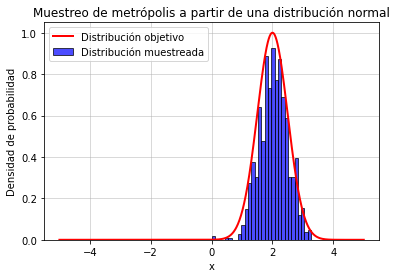

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def target_distribution(x):
    return np.exp(-(x - 2)**2 / (2 * 0.5**2))

def metropolis_sampling(n_iterations, initial_x, proposal_sd):
    samples = [initial_x]
    current_x = initial_x

    for _ in range(n_iterations):
        proposed_x = np.random.normal(
            current_x, proposal_sd
        )
        acceptance_ratio = min(
            1,
            target_distribution(proposed_x) /
            target_distribution(current_x))

        if np.random.uniform() < acceptance_ratio:
            current_x = proposed_x

        samples.append(current_x)

    return samples

n_iterations = 1000
initial_x = 0
proposal_sd = 1

samples = metropolis_sampling(n_iterations, initial_x, proposal_sd)

plt.figure()
plt.hist(samples,
         bins=30,
         density=True,
         alpha=0.7,
         color='b',
         edgecolor='black', zorder=2)
x_values = np.linspace(-5, 5, 1000)
plt.plot(x_values, target_distribution(x_values), 'r', linewidth=2, zorder=3)
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Muestreo de metrópolis a partir de una distribución normal')
plt.legend(['Distribución objetivo', 'Distribución muestreada'])
plt.grid(True, alpha=0.6, zorder=1)
plt.show()


4)

In [6]:
import numpy as np
import scipy.stats as stats

def cauchy(x):
    return 1 / (1 + x**2)

def metropolis_cauchy(n_iteraciones, valor_inicial):
    muestras = [valor_inicial]
    valor_actual = valor_inicial

    for _ in range(n_iteraciones):
        valor_propuesto = valor_actual + np.random.normal(0, 1)

        ratio_aceptacion = cauchy(valor_propuesto) / cauchy(valor_actual)
        probabilidad_aceptacion = min(1, ratio_aceptacion)
        if np.random.uniform() < probabilidad_aceptacion:
            valor_actual = valor_propuesto

        muestras.append(valor_actual)

    return muestras

n_iteraciones = 1000
valor_inicial = 0  # El valor inicial puede ser cualquier valor

muestras = metropolis_cauchy(n_iteraciones, valor_inicial)

media_posterior = np.mean(muestras)
desviacion_estandar_posterior = np.std(muestras)
cuantiles = np.percentile(muestras, [16, 84])

print("Media posterior:", media_posterior)
print("Desviación estándar posterior:", desviacion_estandar_posterior)
print("Cuantiles:", cuantiles)


Media posterior: 0.3675114892176248
Desviación estándar posterior: 1.7504230211640484
Cuantiles: [-1.00821238  1.96043419]
